In [46]:
from Pipeline import BLEPipeline, WifiPipeline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns

In [47]:
w = WifiPipeline()
# w.extract_packet_features('/root/Documents/Thesis/PCAPS/wifi-01.cap', create_master=False)
w.extract_packet_features(create_master=False)

Old ./Wifi_Source deleted
Total number of packets processed:  1375941
Total data processing time:  1609.22519493
Normalized total processing time per 25k packets:  29.2386300527
Total capture file processing time:  155.663885593
Normalized capture file processing time:  2.82831686812


In [48]:
df = w.make_dataframe()
df = df[df["DeviceType"]!="router"]

Mini       104280
Router     103593
Dropcam     64568
Kasa        23753
Netcam3      4867
Netcam1      4446
Netcam2      4407
Switch2      3046
Switch1      2668
Switch3      2634
Insight      2556
Switch4      2206
Lifx2         627
TpPlug        587
Lifx1         540
TpBulb        202
Name: Name, dtype: int64


In [152]:
b = BLEPipeline()
b.extract_packet_features(create_master=False)

Old ./BLE_Source deleted
Total number of packets processed:  4285634
Total data processing time:  4693.422158
Normalized total processing time per 25k packets:  27.378808818
Total capture file processing time:  942.889714241
Normalized capture file processing time:  5.50029303856


In [153]:
b_df = b.make_dataframe()

August2    224739
Energy1     79039
Energy2     71741
Home1       58810
Home2       58614
Push        32761
Kevo        21107
August1     17314
Weather      8643
Room2        8133
Room1        7728
Door1        7374
Door2        4154
Name: Name, dtype: int64


In [154]:
b_df = b_df[b_df["DeviceType"]!='plug']

In [69]:
b_df.columns

Index([u'Name', u'DeviceName', u'AccessAddr', u'AdvertAddr', u'BLE_LL_Length',
       u'PDUTypeNum', u'TxAddr', u'CompanyID', u'ScanAddr', u'RFChannel',
       u'PacketLength', u'Time', u'DeviceType', u'Set', u'door', u'lock',
       u'plug', u'temp', u'PDUType', u'ADV_DIRECT_IND', u'ADV_IND',
       u'ADV_NONCONN_IND', u'SCAN_REQ', u'SCAN_RSP', u'Assoc_Packets'],
      dtype='object')

In [161]:
def print_cross_section(df, cat_x, cat_y):   
    count_dict = {}
    for x in list(df[cat_x].unique()):
        for y in list(df[cat_y].unique()):
            df_part = df.loc[(df[cat_x]==x) & (df[cat_y]==y)]
            key = str((x, y))
            count_dict[key] = len(df_part)   
    
    pp_dict(count_dict)

def pp_dict(dictionary):
    import json
    print json.dumps(dictionary, sort_keys=True, indent=4)

Simple graph

In [ ]:
sns.countplot(x=df["Subtype"]);

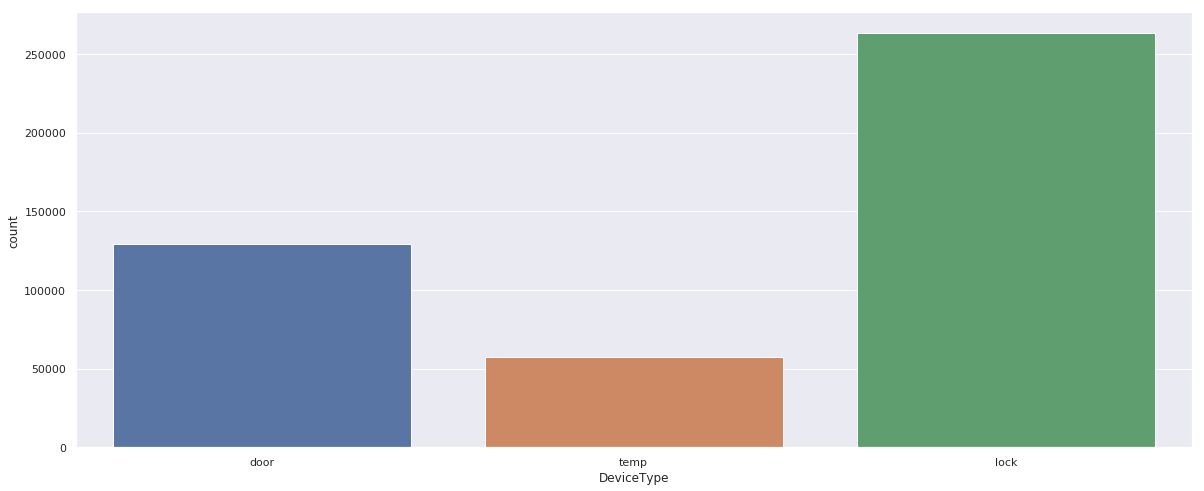

In [155]:
sns.countplot(x=b_df["DeviceType"])

Graph with two categories

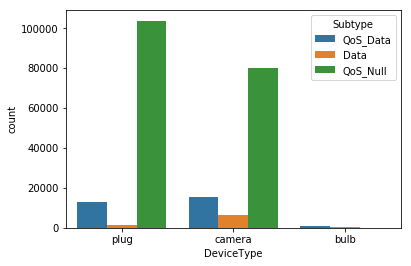

In [50]:
sns.countplot(x=df["DeviceType"], hue=df["Subtype"]);

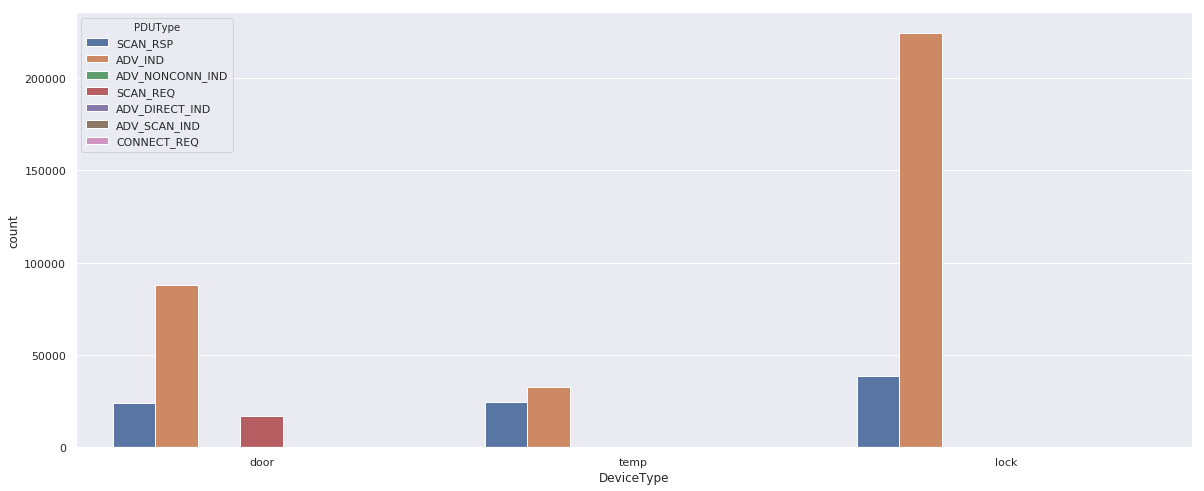

In [156]:
sns.countplot(x=b_df["DeviceType"], hue=b_df["PDUType"]);

Graph with multiple divisions

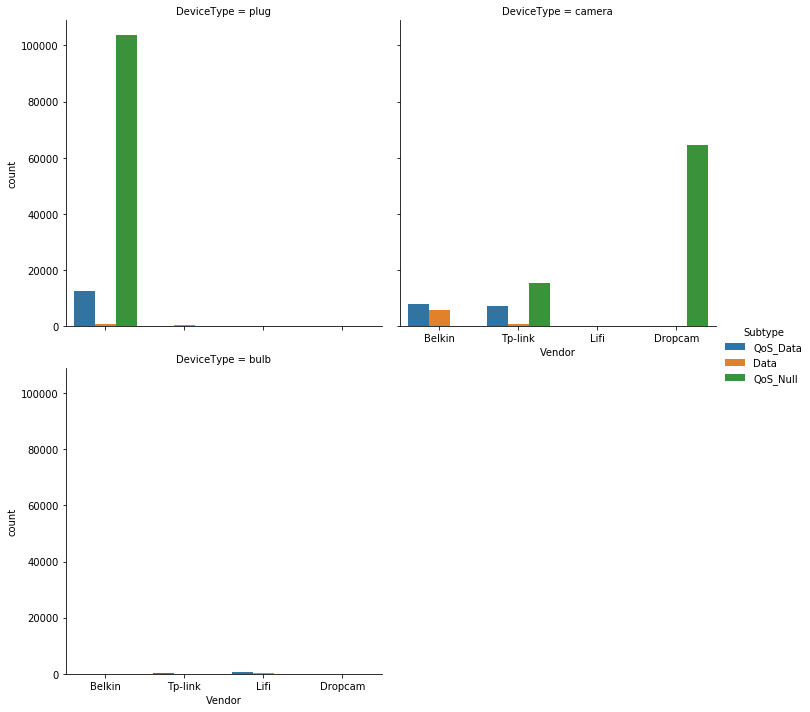

In [51]:
sns.catplot(x="Vendor", col="DeviceType", hue="Subtype", data=df, kind="count", col_wrap=2);

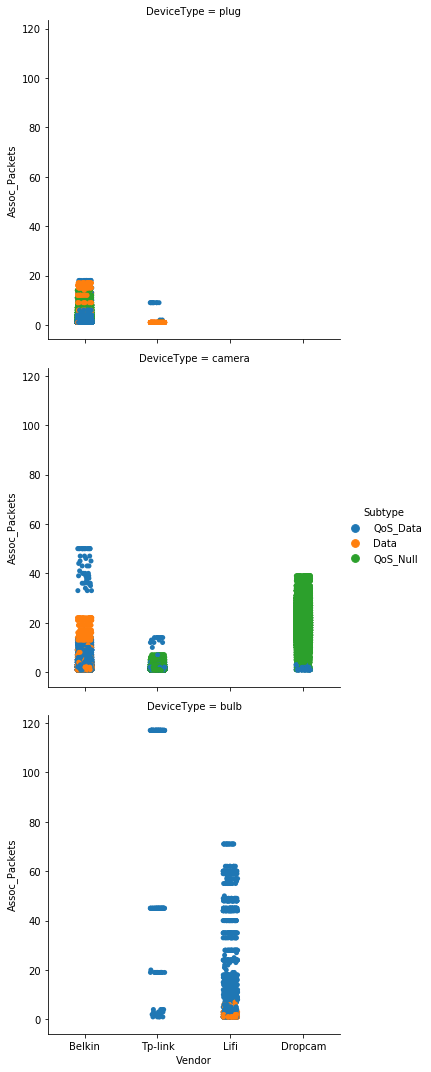

In [52]:
sns.catplot(x="Vendor", y="Assoc_Packets", col="DeviceType", hue="Subtype", col_wrap=1, data=df);

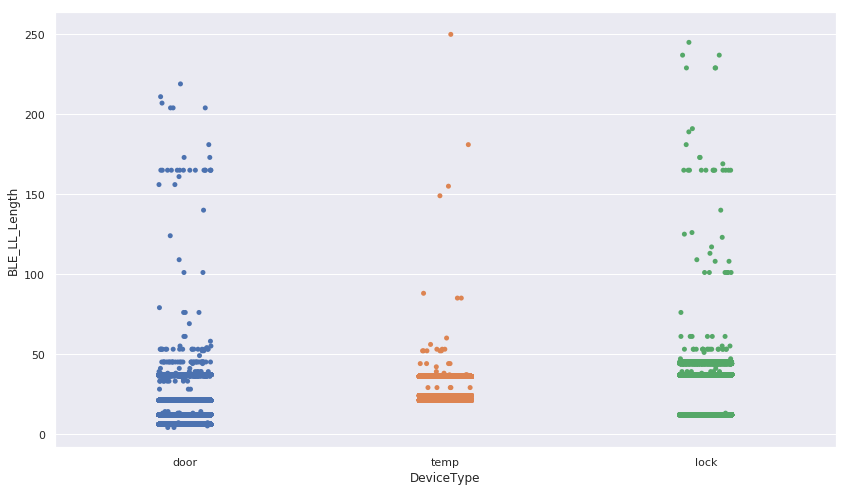

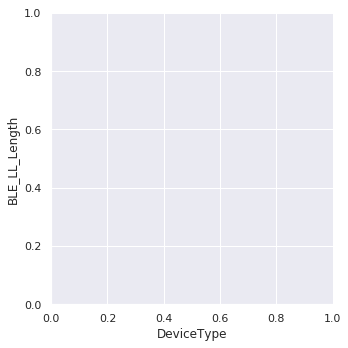

In [159]:
fig, ax = plt.subplots(figsize=(14,8))
sns.catplot(ax=ax, x="DeviceType", y="BLE_LL_Length", data=b_df);

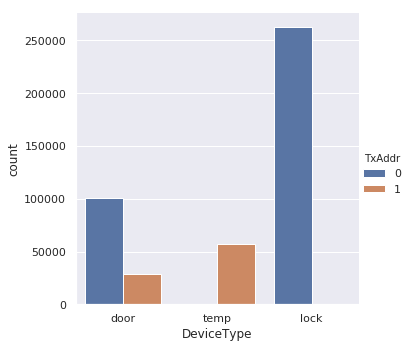

In [160]:
sns.catplot(x="DeviceType", hue="TxAddr", kind="count", data=b_df);

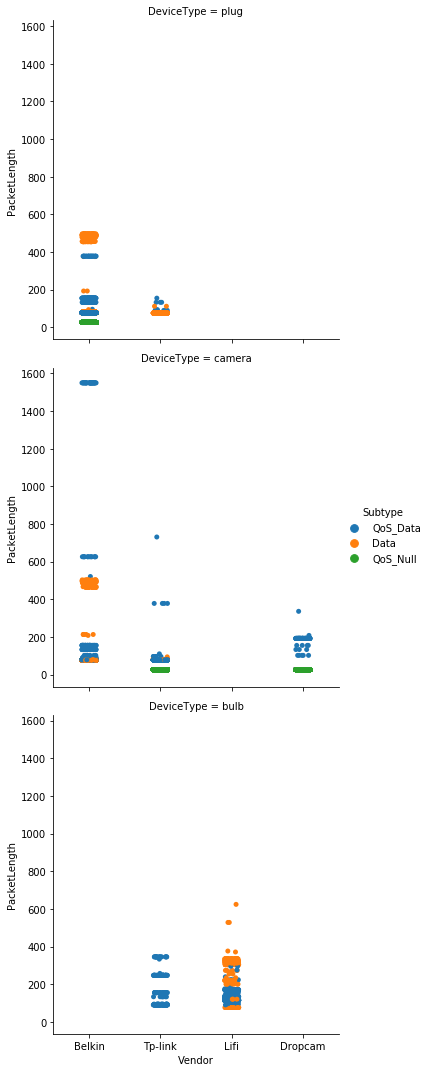

In [53]:
sns.catplot(x="Vendor", y="PacketLength", col="DeviceType", hue="Subtype", col_wrap=1, data=df);

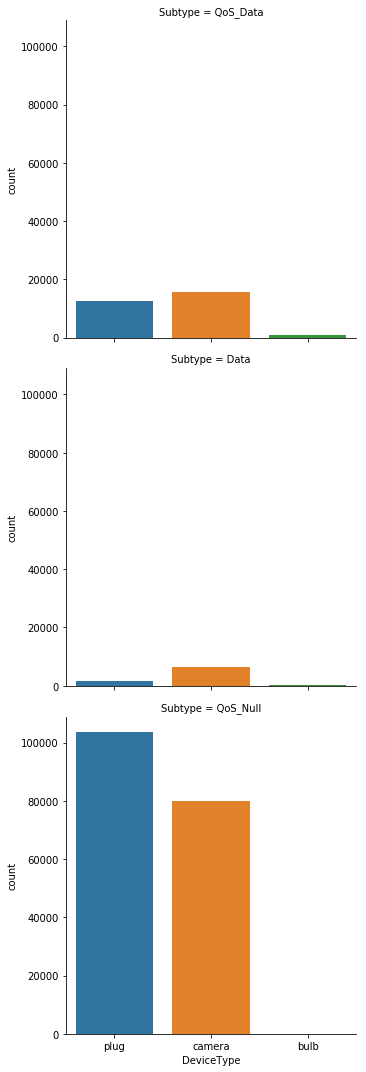

In [65]:
sns.catplot(x="DeviceType", col="Subtype", kind="count", col_wrap=1, data=df);